# Logistic regression from scratch, and the representer theorem

Let us create some fake two-dimensional data that are basically separable, and try to write a simple logistic regression algorithm.

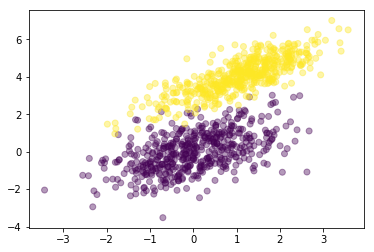

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .8],[.8, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1],c = labels, alpha = .4)

Our goal is to use a logistic-type modeling here. In this case:
$$P_{\rm model}(l({\bf x})=1) = \frac 1{1+\exp(-{\bf \theta} \cdot {\bf x})}~~~ \text{and}~~~ P_{\rm model}(l({\bf x})=0) = \frac {\exp(-{\bf \theta} \cdot {\bf x})}{1+\exp(-{\bf \theta} \cdot {\bf x})}$$


Now, we use the cross-entropy loss, and we write:
$${\rm Loss} = - \sum_{\rm dataset} \sum_{l=0,1} P_{\rm true}(x=l) \log(P_{\rm model}(x=l)) $$
This yields the simpler expression:
$${\rm Loss} =  \sum_{\rm dataset} - y_i {\bf \theta} \cdot {\bf x}_i  + \log{(1+\exp({\bf \theta} \cdot {\bf x}_i ))} $$

Let us implement these function

In [2]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_loss(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return -ll

In order to perform optimization, we need to compute the gradient and perform gradient ascent. Here we have:

$$\nabla {\rm Loss} =  \sum_{i \in \rm dataset} - y_i  {\bf x}_i  + {\bf x}_i  \frac{\exp({\bf \theta} \cdot {\bf x}_i )}{(1+\exp({\bf \theta} \cdot {\bf x}_i ))} = - \sum_{i \in \rm dataset} {\bf x^T}_i (y_i - P(l({\bf x_i})=1)) $$

We can now write the  logistic regression

In [3]:
def logistic_regression(features, target, num_steps, learning_rate):

    weights = np.zeros(features.shape[1])##Initialization from 0
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood from time to time
        if step % 10000 == 0:
            print (step," ",log_loss(features, target, weights))
        
    return weights

We use the usual trick of adding a "1" to the data so that we can actually linear fitting, and call the regression function

In [4]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels, num_steps = 300000, learning_rate = 5e-5)

0   641.491541332
10000   40.7904795498
20000   35.5861867021
30000   33.6650264874
40000   32.6814715095
50000   32.097685066
60000   31.7202915753
70000   31.4623361976
80000   31.2789626252
90000   31.1447612121
100000   31.0443250718
110000   30.9678170647
120000   30.9086965093
130000   30.8624705071
140000   30.8259692845
150000   30.7969062619
160000   30.7736007463
170000   30.7547974799
180000   30.7395459682
190000   30.7271178558
200000   30.7169491741
210000   30.7085992342
220000   30.7017208946
230000   30.6960387444
240000   30.6913328909
250000   30.6874267701
260000   30.6841778888
270000   30.6814707252
280000   30.6792112393
290000   30.6773225952


Now we can plot the prediction from our model, and check how good they are on the training dataset

In [5]:
def line(x,a,b,c):
    return -x*b/c-a/c
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

Accuracy: 0.988


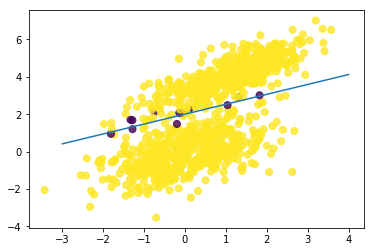

In [6]:
plt.figure(figsize = (6, 4))
plt.scatter(dataset[:, 0], dataset[:, 1],
            c = (preds == labels) , alpha = .8, s = 50)
plt.plot([-3,4],[myline(-3),myline(4)])

# Lower dimension

In high dimensional statistcs problems, it is often the case that the number of points are of the same order as the dimension. Let us mimick this by using fewer points in dimension 2!

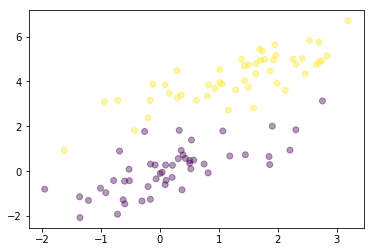

In [7]:
np.random.seed(12)
num_observations = 50

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)

Of course, we could just redo our fit

In [8]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels,num_steps = 100000, learning_rate = 1e-1)

0   303.551868189
10000   2.38215862604
20000   2.37614662598
30000   2.37568936619
40000   2.3756445954
50000   2.37563989842
60000   2.37563939493
70000   2.37563934058
80000   2.3756393347
90000   2.37563933406


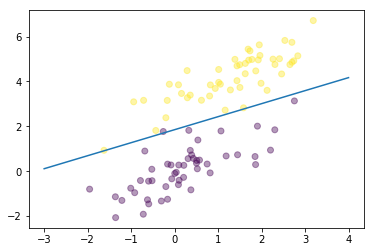

In [9]:
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)
plt.plot([-3,4],[myline(-3),myline(4)])

BTW: an interesting experiment is to have a situation when the data can be linearly seprated. In this case, it is interesting to stop the fitting a bit early, then we see that as we continue to fit, the separatrix moves "away" from the point, and actually help putting a margin, thus helpling the generalization. This is one of the appeal of the cross-entropy loss.

# Representer theorem

Now, we shall illusrtate the Representer theorem. It states that instead of using 
$\sigma(a*x_1+b*x_2+c)$, we can parametrize everything as
$\sigma(\sum_{i=1}^P \alpha_i x_i \cdot x)$ and perform gradient descent in $\{\alpha\}$.

Let us do this, and let's do it in a non efficient way to see how it actually works.

Essentially we just replace $s={\bf \theta} \cdot {\bf x}_i$ by
$$
s=\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j)
$$

So the loss now reads
$${\rm Loss} =  \sum_{i \in \rm dataset} - y_i (\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j))  + \log{(1+\exp(\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j) ))} $$

This transofrm the gradient descent into:

$$\nabla_j {\rm Loss} =  \sum_{i \in \rm dataset} - y_i  {\bf x}_i \cdot {\bf x}_j   + {\bf x}_i \cdot {\bf x}_j  \frac{\exp(\sum_{j=1}^n \alpha_{j'} ({\bf x}_i \cdot {\bf x}_{j'}))}{(1+\exp(\sum_{j=1}^n \alpha_{j'} ({\bf x}_i \cdot {\bf x}_{j'}) ))}  = - \sum_{i \in \rm dataset} {\bf x}_i \cdot {\bf x}_j  (y_i - P(l({\bf x_i})=1)) $$

This is quite similar to the former one, but we see we are going to use the scalar products between of datapoints fairly often. Let us thus give it a name and compute it once for all. We define the gram matrix
$$
K_{i,j} = {\bf x}_i \cdot {\bf x}_j
$$

In [10]:
gram_matrix = data_with_intercept@data_with_intercept.T

Now the gradient is written
$$\nabla_j {\rm Loss}  = - \sum_{i \in \rm dataset} K_{i,j}  (y_i - P(l({\bf x_i})=1)) $$

In [11]:
def new_log_loss(gram_matrix,target, weights):
    scores = gram_matrix@weights
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [12]:
def new_logistic_regression(gram, target, num_steps, learning_rate):
    weights = np.zeros(gram.shape[0])#now this scales with number of datapoints
    
    for step in range(num_steps):
        scores = gram@weights
        predictions = sigmoid(scores)#this is like before

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = gram@output_error_signal
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (step," ",log_loss(gram_matrix, target, weights))
        
    return weights

In [13]:
weights = new_logistic_regression(gram_matrix, labels, num_steps = 1000000, learning_rate = 1e-4)

0   425.138625668
10000   2.85997900386
20000   2.65544873425
30000   2.56383438491
40000   2.51154537633
50000   2.47809798463
60000   2.45518531844
70000   2.43874198955
80000   2.42653398431
90000   2.41723182061
100000   2.40999646293
110000   2.40427383616
120000   2.39968455173
130000   2.39596101047
140000   2.39290972545
150000   2.39038782158
160000   2.38828787102
170000   2.38652781943
180000   2.3850441238
190000   2.38378697414
200000   2.38271690099
210000   2.38180232499
220000   2.38101775924
230000   2.38034247207
240000   2.37975947968
250000   2.37925477853
260000   2.37881675421
270000   2.37843572183
280000   2.37810356548
290000   2.37781345319
300000   2.37755960967
310000   2.37733713404
320000   2.3771418526
330000   2.37697019914
340000   2.37681911724
350000   2.37668597987
360000   2.37656852312
370000   2.37646479121
380000   2.37637309066
390000   2.37629195195
400000   2.37622009739
410000   2.37615641398
420000   2.37609993046
430000   2.37604979792
4400